# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 5.1

Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
M=10000
N=100

In order to determine the average distance of the electron from the nucleus we have to determine the "shape" of the wavefunction, which in this simple example is known analytically. The wavefunction, or, more accurately, its square module, represents the probability density for the electron to occupy a particular position: it can be sampled using Monte Carlo steps, as if we were to measure the positions occupied by an electron in motion around the nucleus. 

The basic code for the simulation is the same used for the random walk, with the additional implementation of an acceptance function to execute a Metropolis algorithm. The transition probability $T(\vec{x}|\vec{y})$ is taken as uniform: given a new, random configuration, a random value $k$ is generated in $[0,1)$ and the move is accepted if $ k < \dfrac{p(y)}{p(x)}$. It can be ssen that with this method the walk tends to move more likely where the probaiblity ditribution has high values, while it will avoid configurations with low probaiblity, effectively sampling the proper distribution given a long enough time.

Two kinds of Monte Carlo steps were implemented: 
- continuous steps of length randomly chosen each time between $[0,a]$ uniformely
- conitnuous steps of length distributed on a gaussian with mean $\mu = 0 $, variance $\sigma = 1$ and height $b$

The value of the parameters $a$ and $b$, both for the ground state and excited state wavefunction, were determined so that the walk would accept ~50% of moves. This empirical rule was followed in order to have enough accepted moves but without having a too high correlation between subsequent moves. In order to do this, I simply run the code several times adjusting the parameters

The choice of the starting point cannot be random: for example, in the origin of the coordinate system, where the nucleus is placed, the wavefunction is not defined since the potential diverges; otherwise, starting too far off might imply a longer time for the electron to get closer to the centre and thus for the system to equilibrate. At first, in order to avoid problems, the simulations began at coordinates $(0,0,10)$, quite close to the nucleus without risking to cross the point where the wavefunctions are not defined.

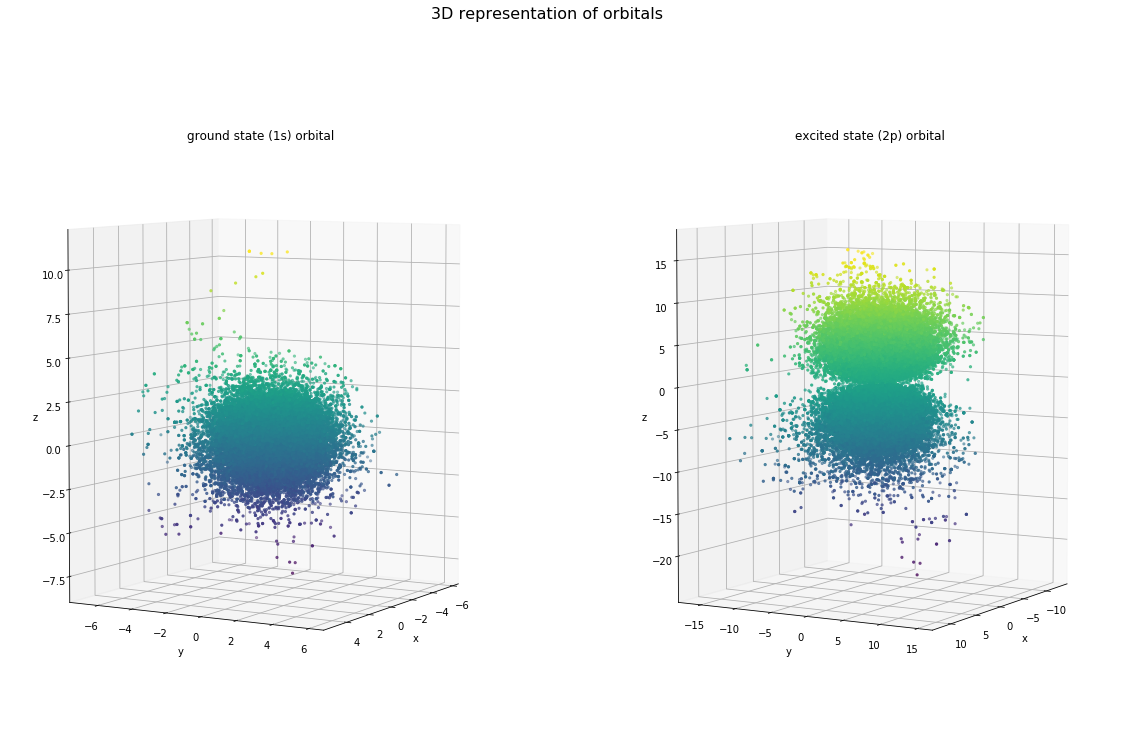

In [68]:
X_e, Y_e, Z_e = np.loadtxt("data_5_1/e2p_position.txt", usecols=(0,1,2), unpack = True)
X_g, Y_g, Z_g = np.loadtxt("data_5_1/gs_position.txt", usecols=(0,1,2), unpack = True)

fig = plt.figure(figsize=[20,12])
fig.suptitle('3D representation of orbitals', fontsize = 16)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title ('ground state (1s) orbital')
ax.scatter(X_g, Y_g, Z_g, c=Z_g, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5, 30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title ('excited state (2p) orbital')
ax.scatter(X_e, Y_e, Z_e, c=Z_e, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5, 30)
plt.show()

For the hydorgen atom, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$ 

The graphs show exaclty the points sampled by the Monte Carlo simulation, using as acceptance probability the square module of these wavefunctions:

$$ | \Psi_{1,0,0} |^2 = \frac{1}{\pi} e^{-2 r} \quad |\Psi_{2,1,0}|^2 = \frac{z^2}{32 \pi} e^{-r}$$

The shape of these probability densities match quite well with the atomic orbitals we expect for the gound state, spherical and quite closely packed, and for the first excited state, with its characteristic two lobes around the z-axis, with a little gap around the origin. 

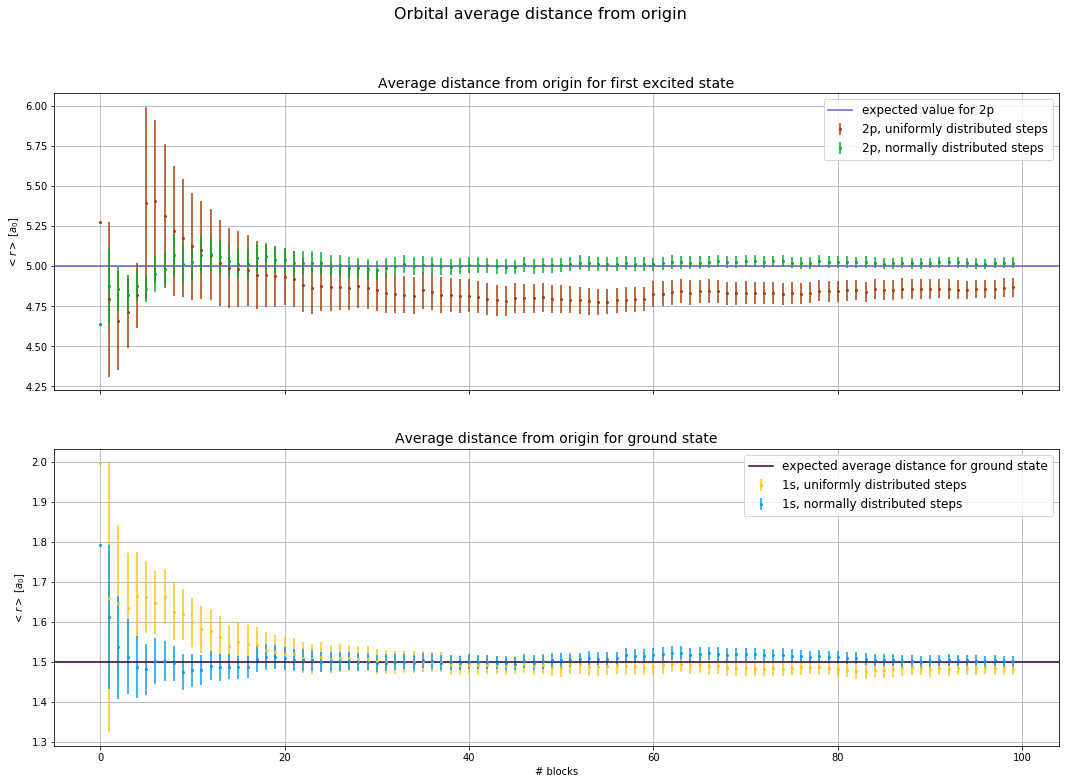

In [34]:
fig,axs = plt.subplots(2, 1, figsize=[18,12], sharex=True)
fig.suptitle('Orbital average distance from origin', fontsize=16)
x = np.arange(N)

axs[1].axhline(y=1.5, color='xkcd:dark violet', label = 'expected average distance for ground state')
prog_ave,err = np.loadtxt("data_5_1/gs_radius_average_uniform.txt",usecols=(0,1),unpack='true')
axs[1].errorbar(x,prog_ave,yerr=err, fmt='o',  markersize=2, label='1s, uniformly distributed steps', color='xkcd:golden yellow')
prog_ave,err = np.loadtxt("data_5_1/gs_radius_average_gaussian.txt",usecols=(0,1),unpack='true')
axs[1].errorbar(x,prog_ave,yerr=err, fmt='o',  markersize=2, label='1s, normally distributed steps', color='xkcd:azure')
axs[1].set_title('Average distance from origin for ground state', fontsize=14)

axs[1].set_xlabel('# blocks')
axs[1].set_ylabel('$<r>$ $[a_0]$')
axs[1].legend(fontsize='large')
axs[1].grid(True)

axs[0].axhline(y=5, color='xkcd:light indigo', label = 'expected value for 2p')
prog_ave,err = np.loadtxt("data_5_1/e2p_radius_average_uniform.txt",usecols=(0,1),unpack='true')
axs[0].errorbar(x,prog_ave,yerr=err, fmt='o',  markersize=2, label='2p, uniformly distributed steps', color='xkcd:rust')
prog_ave,err = np.loadtxt("data_5_1/e2p_radius_average_gaussian.txt",usecols=(0,1),unpack='true')
axs[0].errorbar(x,prog_ave,yerr=err, fmt='o',  markersize=2, label='2p, normally distributed steps', color ='xkcd:kelly green')

axs[0].set_title('Average distance from origin for first excited state', fontsize=14)
axs[0].set_ylabel('$<r>$ $[a_0]$')
axs[0].legend(fontsize='large')
axs[0].grid(True)
plt.show()

The expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Using the blocking method to estimate the average distance from the origin, we can see how progrressively the average approaches the expected value with the two different Monte Carlo steps. Between the two, using normally distributed step sizes tends to converge faster and with lower uncertainty but both methods actually seem to work quite well, as they are compatible with the theoretical orbital radius (as in, mean distance from the nucleus)

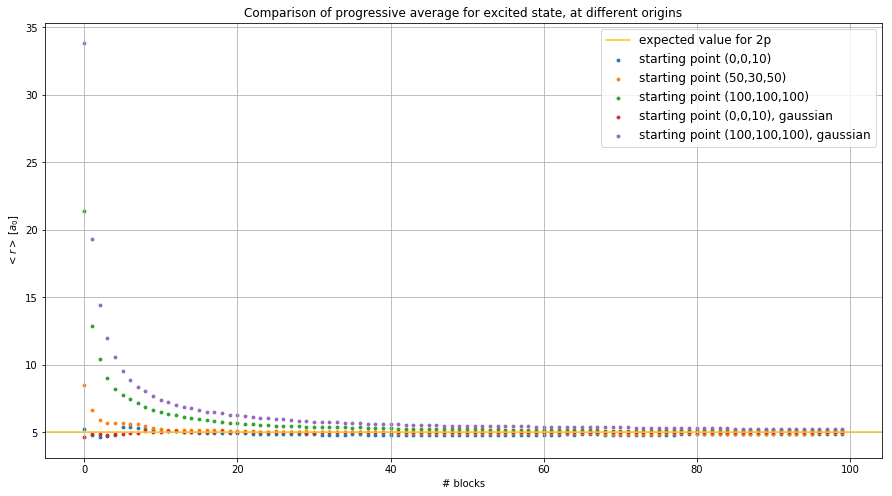

In [56]:
fig = plt.figure(figsize = [15,8])

plt.axhline(y=5, color='xkcd:golden yellow', label = 'expected value for 2p')

near = np.loadtxt("data_5_1/e2p_radius_average_uniform.txt",usecols=(0),unpack='true')
plt.scatter(x,near, s=8, label = "starting point (0,0,10)")

#little_far = np.loadtxt("data_5_1/e2p_radius_average_uniform_1.txt",usecols=(0),unpack='true')
#plt.scatter(x,little_far, s=8, label = "starting point (10,10,10)")

far = np.loadtxt("data_5_1/e2p_radius_average_uniform_2.txt",usecols=(0),unpack='true')
plt.scatter(x, far, s=8, label = "starting point (50,30,50)")

lot_far = np.loadtxt("data_5_1/e2p_radius_average_uniform_3.txt",usecols=(0),unpack='true')
plt.scatter(x, lot_far, s=8, label = "starting point (100,100,100)")

near = np.loadtxt("data_5_1/e2p_radius_average_gaussian.txt",usecols=(0),unpack='true')
plt.scatter(x,near, s=8, label = "starting point (0,0,10), gaussian")

#little_far = np.loadtxt("data_5_1/e2p_radius_average_gaussian_1.txt",usecols=(0),unpack='true')
#plt.scatter(x,little_far, s=8, label = "starting point (10,10,10), gaussian")

#far = np.loadtxt("data_5_1/e2p_radius_average_gaussian_2.txt",usecols=(0),unpack='true')
#plt.scatter(x, far, s=8, label = "starting point (50,30,50), gaussian")

lot_far = np.loadtxt("data_5_1/e2p_radius_average_gaussian_3.txt",usecols=(0),unpack='true')
plt.scatter(x, lot_far, s=8, label = "starting point (100,100,100), gaussian")


plt.title("Comparison of progressive average for excited state, at different origins")
plt.xlabel('# blocks')
plt.ylabel('$<r>$ $[a_0]$')
plt.legend(fontsize='large')
plt.grid(True)
plt.show()

As already stated, an interesting problem to tackle is that of the starting point of the simulation: in principle, all points in the space are equivalent (expect for the origin, where the wavefunction is not defined). However, one would expect that, by starting too far away from the nucleus, the walk would wander about without ever finding the true expectation value.

To study this, I selected a wide range of different starting points and observed the evolution of the mean distance from the origin. As we can see from the selection offered (some were excluded as the graph might appear "too messy") all walks tend to converge to the real expected value. What changes drastically is the number of blocks it needs to be compatible with the theoretical value. By starting too far away, the walk needs to first get closer to the areas around the nucleus. The Metropolis algorithm in fact tends to accept only "acceptable" configurations, with a high enough probabilty. 

Even if the electron starts far away, it is caught by the profile of the wavefunction. However, in these conditions the system needs longer to equilibrate, that is reach configurations which are actually relevant, as in sufficiently realistic.

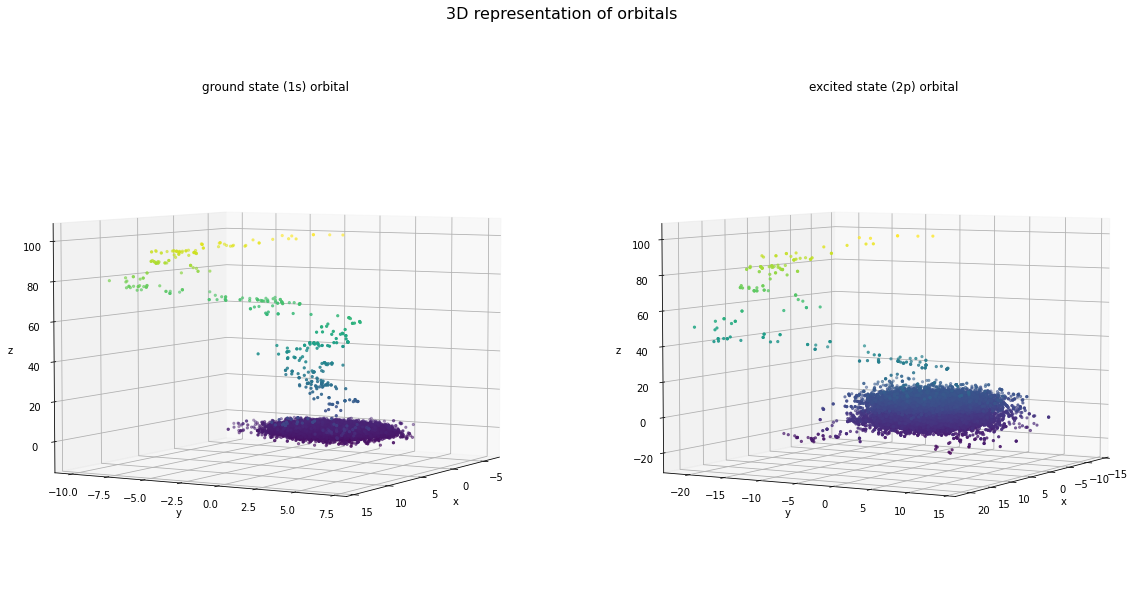

In [3]:
X_e, Y_e, Z_e = np.loadtxt("data_5_1/e2p_position_1.txt", usecols=(0,1,2), unpack = True)
X_g, Y_g, Z_g = np.loadtxt("data_5_1/gs_position_1.txt", usecols=(0,1,2), unpack = True)

fig = plt.figure(figsize=[20,10])
fig.suptitle('3D representation of orbitals', fontsize = 16)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title ('ground state (1s) orbital')
ax.scatter(X_g, Y_g, Z_g, c=Z_g, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5, 30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title ('excited state (2p) orbital')
ax.scatter(X_e, Y_e, Z_e, c=Z_e, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5, 30)
plt.show()

These last graphs show the accepted configurations of simulations started far away from the nucleus. We can see that, before sampling the wavefunction correctly as before (which results a little squished due to the scale of the axes) the electron follows a trail that spirals from the starting point to the areas with higher probabilities: at first it may try to wander off, but after a while it converges to the areas where the probability density is larger, with no other chance to escape.